<a href="https://colab.research.google.com/github/MukulRaj-704/Machine-Learning-Algos/blob/main/Linear%20Regression/Titanic_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This model is a probabilistic classification algorithm that predicts whether a passenger survived or not based on features like class, age, gender, fare, and family details. It works using Bayes’ theorem and assumes that all features are independent, making it simple, fast, and effective for classification tasks.

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [195]:
Titanic=pd.read_csv('/content/drive/My Drive/ML/Datasets/Titanic-Dataset.csv')
Titanic.shape

(891, 12)

In [196]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [197]:
Titanic.isnull().sum()
df=Titanic

In [198]:
print(f"shape of dataset{df.shape}")

print(f"\nNull Values in data \n{df.isnull().sum()}")
print('\nAfter deleting null rows')
df=Titanic.dropna()
print(f"shape{df.shape}")

shape of dataset(891, 12)

Null Values in data 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

After deleting null rows
shape(183, 12)


Here we observe that our data has large missing values and we cant simply drop the rows with null values because our size os data is become smaller

Cabin has too much missing values so we can drop the Cabin Column

In [199]:
df2=Titanic.drop('Cabin',axis=1)
print(f"shape of data after deleting Cabin feature{df2.shape}")

shape of data after deleting Cabin feature(891, 11)


In [200]:
df2.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Age Have 177 missing values and it is almost the 20% of our data size so we can not drop the rows and age is a important fector in our features so we can not drop the column age

In [201]:
print(f"Mean of Age -- {df2['Age'].mean()}")

Mean of Age -- 29.69911764705882


In [ ]:
df2['Age'].fillna(df2['Age'].mean(),inplace=True)

In [203]:
df2.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Emabrked Have 2 missing values so we easily drop the rows

In [205]:
df2=df2.dropna()

Check Duplicate Values in our Dataset

In [206]:
df2.duplicated().sum()

np.int64(0)

In [207]:
corr=df2.corr(numeric_only=True)
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.030300,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.074673,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.327954,0.081656,0.016824,-0.548193
Age,0.030300,-0.074673,-0.327954,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.057686,-0.034040,0.081656,-0.231875,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.178232,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.088604,0.160887,0.217532,1.000000


In our dataset correlation exists but Naive Bays assumes all features are independent so correlation does not affect the model

outliers detection

<Axes: ylabel='Age'>

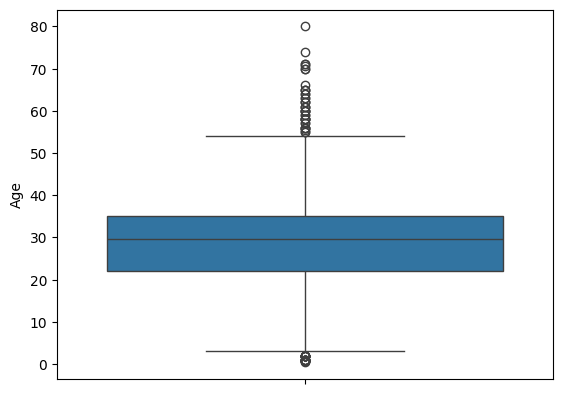

In [208]:
sns.boxplot(df2['Age'])

Age is a important features so that we can not drop the rows with outliers

<Axes: ylabel='Fare'>

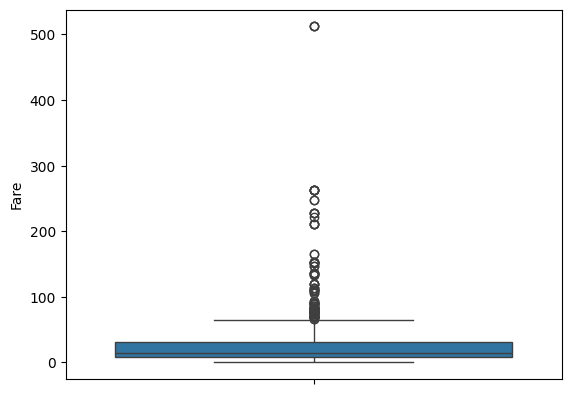

In [209]:
sns.boxplot(df2['Fare'])

<Axes: ylabel='Fare'>

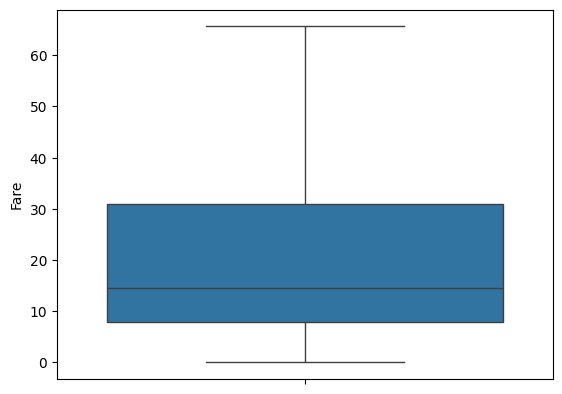

In [210]:
Q1=df2['Fare'].quantile(.25)
Q3=df2['Fare'].quantile(.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
df2['Fare']=df2['Fare'].apply(lambda x : upper_limit if x> upper_limit else x)
sns.boxplot(df2['Fare'])

<Axes: ylabel='SibSp'>

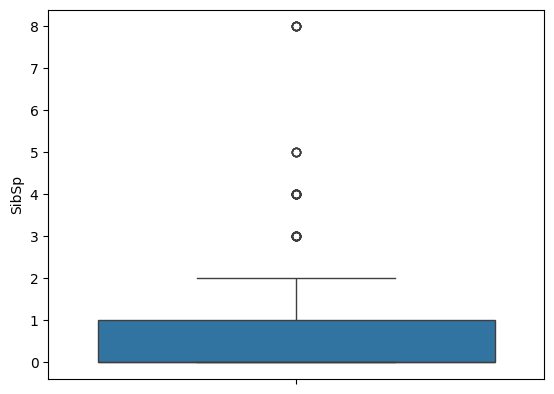

In [211]:
sns.boxplot(df2['SibSp'])

<Axes: ylabel='Parch'>

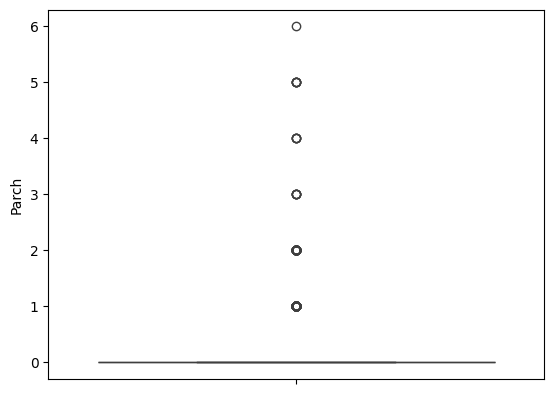

In [212]:
sns.boxplot(df2['Parch'])

we cannot cap the outliers for these two features because they are discrete values not continuous and they are important

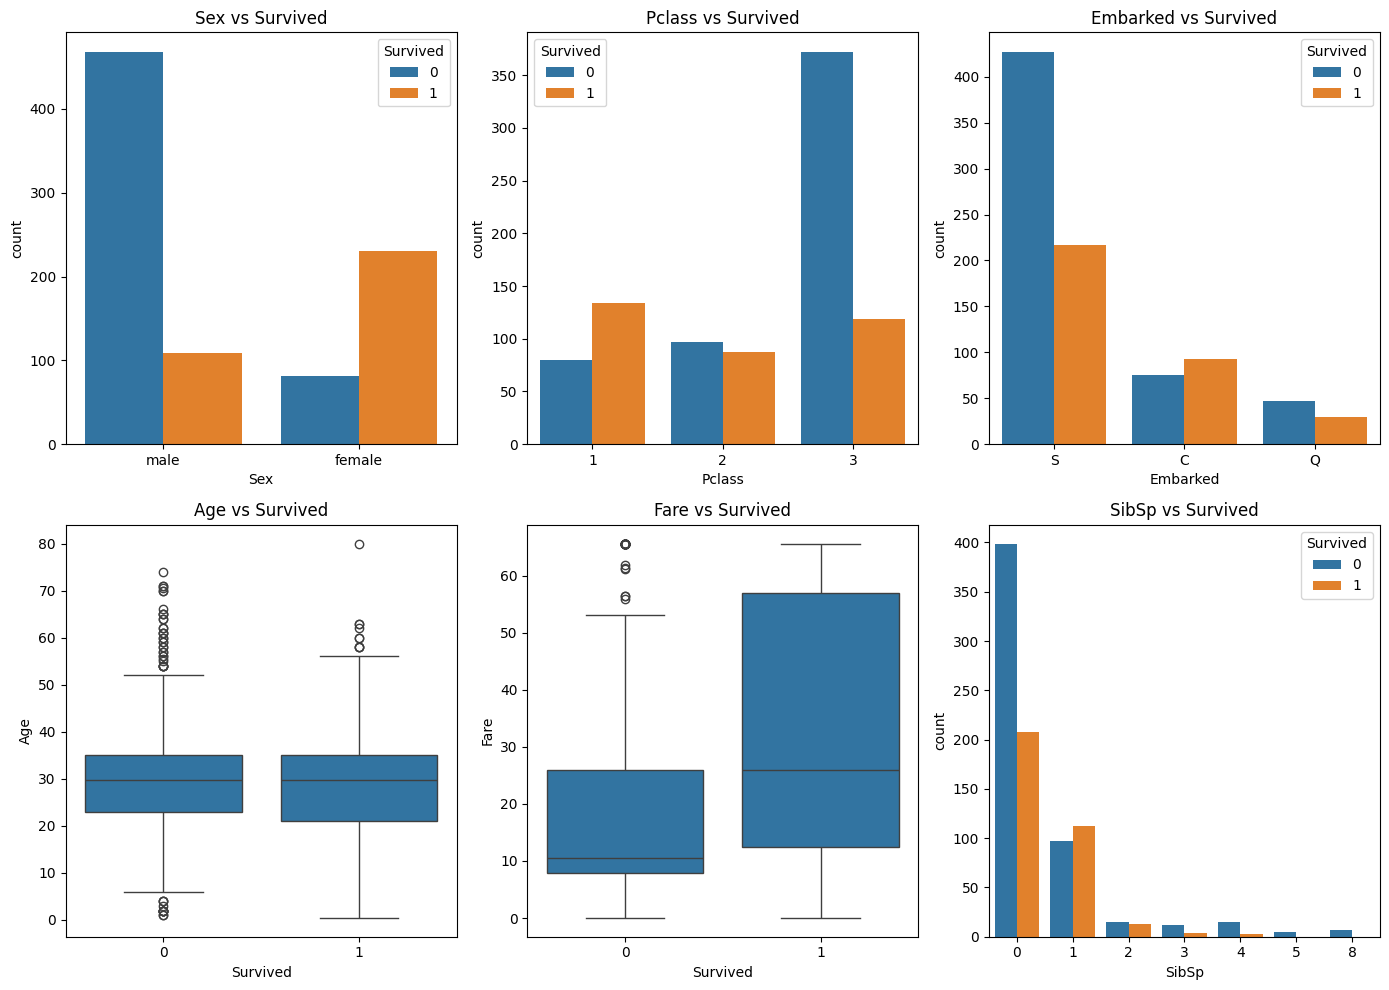

In [213]:
plt.figure(figsize=(14,10))

# 1) Survived vs Sex
plt.subplot(2,3,1)
sns.countplot(x='Sex', hue='Survived', data=df2)
plt.title("Sex vs Survived")

# 2) Survived vs Pclass
plt.subplot(2,3,2)
sns.countplot(x='Pclass', hue='Survived', data=df2)
plt.title("Pclass vs Survived")

# 3) Survived vs Embarked
plt.subplot(2,3,3)
sns.countplot(x='Embarked', hue='Survived', data=df2)
plt.title("Embarked vs Survived")

# 4) Age vs Survived
plt.subplot(2,3,4)
sns.boxplot(x='Survived', y='Age', data=df2)
plt.title("Age vs Survived")

# 5) Fare vs Survived
plt.subplot(2,3,5)
sns.boxplot(x='Survived', y='Fare', data=df2)
plt.title("Fare vs Survived")

# 6) SibSp vs Survived
plt.subplot(2,3,6)
sns.countplot(x='SibSp', hue='Survived', data=df2)
plt.title("SibSp vs Survived")

plt.tight_layout()
plt.show()


Sex vs Survived: Females had a much higher survival rate than males.

Pclass vs Survived: First-class passengers survived more, while third-class passengers had the highest deaths.

Embarked vs Survived: Passengers from Cherbourg had relatively better survival compared to Southampton and Queenstown.

Age vs Survived: Younger passengers, especially children, had slightly better survival chances.

Fare vs Survived: Passengers who paid higher fares were more likely to survive.

SibSp vs Survived: Passengers with small families (0–1 siblings/spouses) had better survival than those with large families.

Removing unnecessery features in Data.
These features are not so much important for us

---



In [214]:
df2.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

Encoding of Categorical Data Into Numerical data

In [216]:
df2['Sex']=df2['Sex'].map({'male':0,'female':1})
df2['Embarked']=df2['Embarked'].map({'S':0,'C':1,'Q':2})

In [217]:
df2.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,65.6563,1
2,1,3,1,26.0,0,0,7.9250,0


In [218]:
from sklearn.model_selection import train_test_split
X = df2.drop('Survived', axis=1)
y = df2['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [220]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [221]:
y_pred = model.predict(X_test)

In [222]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7584269662921348
[[80 29]
 [14 55]]


Pclass, Sex, Age, SibSp, Parch, Fare, Embarked


In [223]:
person = [[1,1,22,0,0,150,1]]
prediction = model.predict(person)
prob = model.predict_proba(person)

print("Prediction:", prediction)
print("Probability:", prob)
print("Survived" if prediction[0] == 1 else "Did Not Survive")

Prediction: [1]
Probability: [[0. 1.]]
Survived
